In [263]:
#Q5
import pandas as pd
for x in ['train.csv', 'test.csv']:
    data = pd.read_csv('Titanic/' + x)
    null_features_counts = list(filter(lambda x: next(iter(x.values())), map(lambda f: {f: len(data.loc[data[f].isnull()])}, data.columns)))
    print(null_features_counts)

[{'Age': 177}, {'Cabin': 687}, {'Embarked': 2}]
[{'Age': 86}, {'Fare': 1}, {'Cabin': 327}]


In [1]:
#Q7
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
q7 = data.count(0).to_frame().transpose().rename(index={0:'count'})

q7 = q7.append(data.mean().to_frame().transpose()).rename(index={0:'mean'})
q7 = q7.append(data.std().to_frame().transpose()).rename(index={0:'std'})
q7 = q7.append(data.min().to_frame().transpose()).rename(index={0:'min'})
q7 = q7.append(data.quantile(0.25).to_frame().transpose()).rename(index={0.25:'25%'})
q7 = q7.append(data.quantile(0.5).to_frame().transpose()).rename(index={0.5:'50%'})
q7 = q7.append(data.quantile(0.75).to_frame().transpose()).rename(index={0.75:'75%'})
q7 = q7.append(data.max().to_frame().transpose()).rename(index={0:'max'})

for x in ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    q7[x] = q7[x].astype(float)

for x in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    q7 = q7.drop(x, 1) 
q7

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Q8
import pandas as pd
data = pd.read_csv('Titanic/train.csv')

q8 = data.count(0).to_frame().transpose()
q8 = q8.append(data.nunique().to_frame().transpose())
q8 = q8.append(data.mode().iloc[0])
q8 = q8.append({'PassengerId': 0,'Survived': data['Survived'].value_counts().max(), 'Pclass': data['Pclass'].value_counts().max(),'Name': '','Sex': data['Sex'].value_counts().max(),'Age': 0,'SibSp': data['SibSp'].value_counts().max(),'Parch': data['Parch'].value_counts().max(),'Ticket': data['Ticket'].value_counts().max(),'Fare': data['Fare'].value_counts().max(),'Cabin': data['Cabin'].value_counts().max(),'Embarked': data['Embarked'].value_counts().max()}, ignore_index=True)
for x in ['PassengerId', 'Name', 'Age']:
    q8 = q8.drop(x, 1) 
q8 = q8.rename(index={0:'count'})
q8 = q8.rename(index={1:'unique'})
q8 = q8.rename(index={2:'top'})
q8 = q8.rename(index={3:'freq'})
q8

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891,891.0,891.0,891,891.00,204,889
unique,2.0,3.0,2,7.0,7.0,681,248.00,147,3
top,0.0,3.0,male,0.0,0.0,1601,8.05,B96 B98,S
freq,549.0,491.0,577,608.0,678.0,7,43.00,4,644


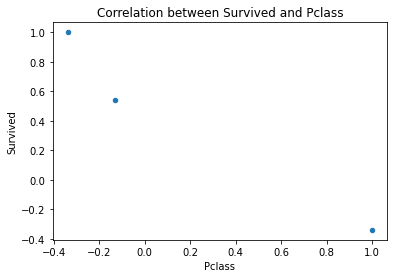

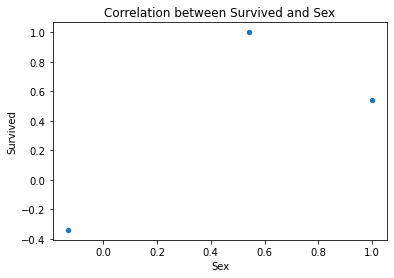

In [42]:
#Q9 AND Q10
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
data = data.replace({'Sex': 'male'}, {'Sex': 0})
data = data.replace({'Sex': 'female'}, {'Sex': 1})
for x in ['PassengerId', 'Name', 'Age', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Parch', 'Fare']:
    data = data.drop(x, 1) 
q9 = data.corr()
q9.plot.scatter(x='Pclass',y='Survived', title='Correlation between Survived and Pclass');
q9.plot.scatter(x='Sex',y='Survived', title='Correlation between Survived and Sex');


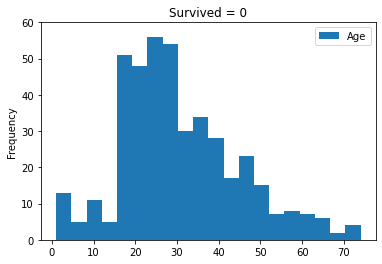

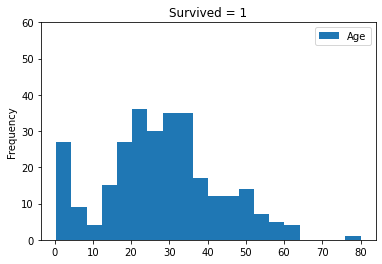

In [340]:
#Q11
import pandas as pd
import pylab as pl
data = pd.read_csv('Titanic/train.csv')
for x in ['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
     data = data.drop(x, 1) 
for survived,group in data.groupby('Survived'):
    group.drop('Survived', 1).plot(kind='hist',title='Survived = ' + str(survived), bins=20, ylim=(0,60))

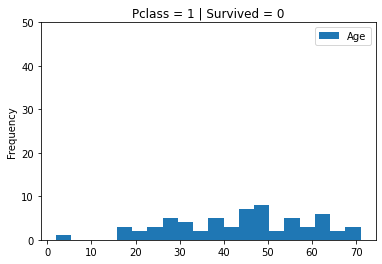

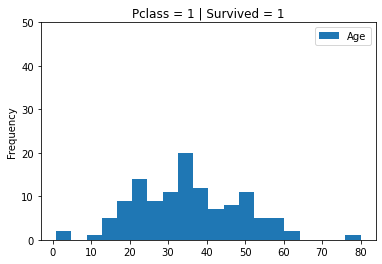

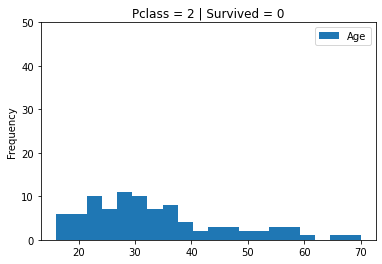

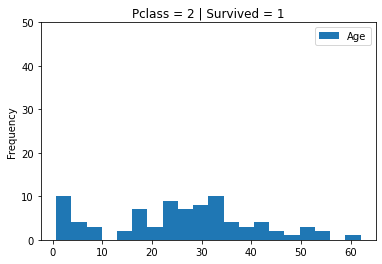

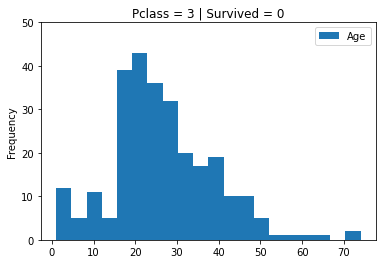

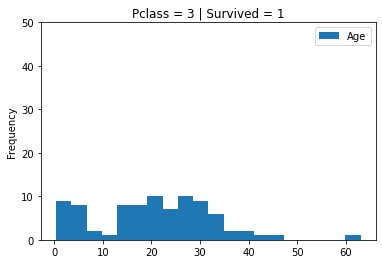

In [6]:
#Q12
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
for x in ['PassengerId', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Parch', 'Fare']:
    data = data.drop(x, 1) 
for pClass, group in data.groupby('Pclass'):
    for survived, group2 in group.groupby('Survived'):
        group2.drop('Pclass',1).drop('Survived',1).plot(kind='hist',title='Pclass = ' + str(pClass) + ' | ' + 'Survived = ' + str(survived), bins=20, ylim=(0,50));

In [4]:
#Q13
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
for x in ['PassengerId', 'Name', 'Pclass', 'Age', 'SibSp', 'Ticket', 'Cabin', 'Parch']:
    data = data.drop(x, 1) 
for g, group in data.groupby(['Embarked', 'Survived']):
    print(group)
    print('\nnueva linea')
    #group = group.drop('Embarked',1).drop('Survived',1)
    #result = group.groupby('Sex').mean()
    #result.plot(kind='bar', title='Embarked = ' + str(g[0]) + ' | ' + 'Survived = ' + str(g[1]), alpha= 0.5);

Survived     Sex     Fare Embarked
26          0    male   7.2250        C
30          0    male  27.7208        C
34          0    male  82.1708        C
42          0    male   7.8958        C
48          0    male  21.6792        C
..        ...     ...      ...      ...
832         0    male   7.2292        C
843         0    male   6.4375        C
847         0    male   7.8958        C
852         0  female  15.2458        C
859         0    male   7.2292        C

[75 rows x 4 columns]

nueva linea
     Survived     Sex      Fare Embarked
1           1  female   71.2833        C
9           1  female   30.0708        C
19          1  female    7.2250        C
31          1  female  146.5208        C
36          1    male    7.2292        C
..        ...     ...       ...      ...
866         1  female   13.8583        C
874         1  female   24.0000        C
875         1  female    7.2250        C
879         1  female   83.1583        C
889         1    male   30.0000       

In [80]:
#Q14
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
tickets_ = data.pivot_table(index=['Ticket'], aggfunc ='size').to_frame()
tickets_dups = tickets_.loc[tickets_[0] > 1]
print('Ticket duplicate rate: ' + str(len(tickets_dups.index) / len(tickets_.index)))
print(tickets_dups)
tickets_2 = data.pivot_table(index=['Ticket', 'Survived'], aggfunc ='size').to_frame()
print(tickets_2)
# for x in ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']:
#     data = data.drop(x, 1)


# data['Ticket']=data['Ticket'].astype('category').cat.codes
# q14 = data.corr()
# q14.plot.scatter(x='Ticket',y='Survived', title='Correlation between Survived and Ticket');

Ticket rate duplicate: 0.19676945668135096
                  0
Ticket             
110152            3
110413            3
110465            2
111361            2
113505            2
...              ..
SC/Paris 2123     3
STON/O2. 3101279  2
W./C. 6607        2
W./C. 6608        4
WE/P 5735         2

[134 rows x 1 columns]
                      0
Ticket      Survived   
110152      1         3
110413      0         1
            1         2
110465      0         2
110564      1         1
...                  ..
W./C. 6609  0         1
W.E.P. 5734 0         1
W/C 14208   0         1
WE/P 5735   0         1
            1         1

[730 rows x 1 columns]


In [101]:
#Q15
import pandas as pd
combined = pd.concat([pd.read_csv('Titanic/train.csv'),pd.read_csv('Titanic/test.csv')])
null_cabins = len(combined.loc[combined['Cabin'].isnull()])
total = len(combined)
unique_cabins = len(combined.pivot_table(index=['Cabin'], aggfunc ='size').to_frame())

print('unique cabins: ' + str(unique_cabins))
print('total records: ' + str(total))
print('missing cabins: ' + str(null_cabins))
print('missing cabins ratio: ' + str(null_cabins/total))


unique cabins: 186
total records: 1309
missing cabins: 1014
missing cabins ratio: 0.774637127578304


In [202]:
#Q16
import pandas as pd
combined = pd.concat([pd.read_csv('Titanic/train.csv'),pd.read_csv('Titanic/test.csv')])
combined = combined.replace({'Sex': 'male'}, {'Sex': 0})
combined = combined.replace({'Sex': 'female'}, {'Sex': 1})
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [108]:
#Q17
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
no_age = data.drop('Age', 1)
age = data['Age'].values
#incomplete

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [205]:
#Q18
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
embarked = data.pivot_table(index=['Embarked'], aggfunc ='size').to_frame().sort_values([0], ascending=False).iloc[0]

print('Most common port of embarkation: ' + embarked.name + ', with: ' + str(embarked.values[0]) + ' occurrences')
print('Number of records with null Embarked values: ' + str(len(data.loc[data['Embarked'].isnull()])))
data.loc[data['Embarked'].isnull()] = embarked.name
print('New number of records with null Embarked values: ' + str(len(data.loc[data['Embarked'].isnull()])))

Most common port of embarkation: S, with: 644 occurrences
Number of records with null Embarked values: 2
New number of records with null Embarked values: 0


In [203]:
#Q19
import pandas as pd
data = pd.read_csv('Titanic/test.csv')
fare = data.pivot_table(index=['Fare'], aggfunc ='size').to_frame().sort_values([0], ascending=False).iloc[0]

print('Most common Fare: ' + str(fare.name) + ', with: ' + str(fare.values[0]) + ' occurrences')
print('Number of records with null Fare values: ' + str(len(data.loc[data['Fare'].isnull()])))
data.loc[data['Fare'].isnull()] = fare.name
print('New number of records with null Fare values: ' + str(len(data.loc[data['Fare'].isnull()])))

Most common Fare: 8.05, with: 60 occurrences
Number of records with null Fare values: 1
New number of records with null Fare values: 0


In [230]:
#Q20
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
data['Fare'] = pd.cut(data['Fare'], bins=[-0.001,7.91,14.454,31.0,512.329], labels=[0,1,2,3])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S


In [232]:
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object